# MATH10098: Numerical Linear Algebra - Computer lab week 3

# Pair-programming

In the computer labs in this course, you will work on a programming task together with a partner, using a method called **pair programming**. 

## What is pair programming?

Pair programming is a method where two people (usually) sit in front of the same computer. Each person has a specific role:
- The **driver** writes and runs the code, and is the only person allowed to do it. They explain what they do to the navigator.
- The **navigator** observes and helps the driver, spots errors in the code, gives suggestions and ideas... They are not allowed to write code.

The two programmers decide who should "drive" first, and that person takes the keyboard to start working. The other person, the navigator, watches the screen and helps the driver with the task -- without touching the mouse or keyboard.

Then, after a while, the driver passes the keyboard and mouse to the navigator, and they switch roles.

## How does it work online?

This year, unfortunately, you won't be able to sit next to your partner and to share a computer. Instead, you will use Teams to communicate, share your screens, and "pass the keyboard" when you switch roles. During computer labs, we will typically ask you to switch roles every 15 minutes or so.

A typical workflow in an online computer lab:

1. Go the channel in Teams based on your surname, where your tutor will start a meeting.
2. Your tutor breaks the group into pairs, and each pair starts their own meeting.
3. Decide which one of you starts as the driver. The driver downloads the Jupyter notebook from Learn, and starts scren sharing.
4. Work through the exercises, switching roles every 10-15 minutes.
5. At the end, make sure both of you have a copy of all the code that you wrote!

## How do we switch roles?

When you switch roles, you need to pass on the code that the driver has written so far to the new driver. This can be done in the following ways:

Option 1: Using pastebin
1. The old driver goes to to https://pastebin.com/.
2. The old driver copies the code they want to share, and pastes it into the pastebin website.
3. The old driver clicks on "Create paste", and shares the new URL with the new driver.
4. The new driver copies the code from the URL, and pastes it into their Jupyter notebook.

Option 2: Using Teams
1. The old driver downloads the Jupyter notebook from Noteable. (Skip this step if you are working locally on your computer.)
2. The old driver sends the Jupyter notebook to the new driver via the "Chat" in Teams. (Go to the Chat, click on the "New chat" logo, type the name of the other student and attach the Jupyter notebook as an attachment.)

## Useful tips

- If you can't decide who should be the driver first, pick the person who is currently closest to the North Pole.
- Throughout a pair programming session, the driver and the navigator should **communicate** as much as possible. For example, when typing code, the driver can explain what they want to do, talk through their thought process, ask the navigator for help; the navigator can provide feedback on the code, ask the driver to do something differently, spot mistakes and suggest corrections, consult the documentation (or other notes)...

---

# Computer lab exercises
Work on these exercises with your partner during the live computer lab.

### Exercise 1: LU factorisation (Standard)

In the code cell below:

(i) Write a Python function `LU` to implement Algorithm LU from the lecture notes. As stated in the algorithm, your function should take a single input variable `A`, representing a matrix $A \in \mathbb{R}^{n\times n}$, and return two variables, `L` and `U`, representing the matrices $L, U \in \mathbb{R}^{n\times n}$ in the LU factorisation of $A$, such that $A = LU$.

(ii) Test your function on the following example:

$$
A =
\begin{bmatrix}
2&1&1 \\ 4&3&3 \\ 8&7&9
\end{bmatrix}
=
\begin{bmatrix}
1&0&0 \\ 2&1&0 \\ 4&3&1
\end{bmatrix}
\begin{bmatrix}
2&1&1 \\ 0&1&1 \\ 0&0&2
\end{bmatrix}
= LU.
$$

Here is the pseudo-code from the lecture notes:

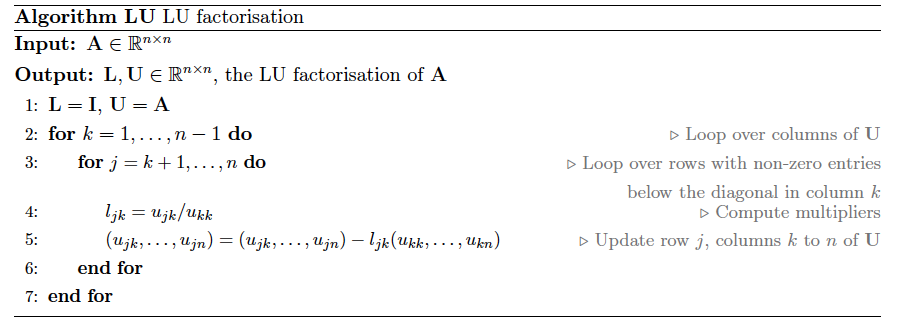

In [31]:
import numpy as np

def LU(A):
    
    n = A.shape[0]
    L = np.eye(n)
    U = A
    
    for k in range(0,n):
        for j in range(k+1,n):
            
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:n-1] = U[j,k:n-1] - L[j,k]*U[k,k:n-1]
            
            
    return L, U

In [32]:
A = np.array([[2,1,1],[4,3,3],[8,7,9]])

LU(A)

(array([[1., 0., 0.],
        [2., 1., 0.],
        [4., 3., 1.]]),
 array([[2, 1, 1],
        [0, 1, 3],
        [0, 0, 9]]))

---

### Back Substitution

The function `BS` below solves the equation $Ux=y$, for a non-singular, upper triangular matrix $U\in \mathbb{R}^{n\times n}$ and a vector $y \in \mathbb{R}^n$, using Algorithm BS from the lecture notes. 

In [36]:
import numpy as np

def BS(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - U[j, j+1:] @ x[j+1:]) / U[j, j]
    
    return x

***Comments:*** Note that for `j = n - 1`, the vectors `U[j, j+1:]` and `x[j+1:]` are empty. This corresponds to the fact that the sum in Line 2 of Algorithm BS does not contain any terms for $j=n$.

---

### Exercise 2: Forward Substitution (Standard)

(i) Write down (in pseudocode) the forward substitution algorithm, i.e. write an algorithm that solves the equation $Ly=b$, for a non-singular, lower triangular matrix $L\in \mathbb{R}^{n\times n}$ and a vector $b \in \mathbb{R}^n$. (This should be similar to Algorithm BS from the lecture notes.) You can for example use a page in the OneNote notebook to write the pseudocode together.

(ii) In the cell below, write a function `FS` to implement your forward substitution algorithm. Your function should take two input arguments, `L` and `b`, and return one output variable, `y`.

(iii) What is the computational cost of the forward substitution algorithm?

In [45]:
import numpy as np

def FS(L, b):
    n = L.shape[0]
    y = np.zeros(n)
    
    for j in range(n):
        y[j] = (b[j] - L[j, 0:j] @ y[0:j]) / L[j, j]
    
    return y 


### Exercise 3: Gaussian Elimination (Easy)

(i) In the code cell below, write a function `GE` which performs Gaussian elimination, using your functions `LU`, `FS`, and `BS`. The function `GE` should take two input arguments, `A` and `b`, and return one variable `x`, representing the solution $x \in \mathbb{R}^n$ of $Ax=b$.

*Note: recall that you do not need to copy/paste your previous functions into the cell below -- simply run the cells in which you have written the functions to store them in memory and make them available to* `GE`.

(ii) Test your function `GE` with the following values:

$$
A =
\begin{bmatrix}
2&1&1 \\ 4&3&3 \\ 8&7&9
\end{bmatrix}\, , \quad
b =
\begin{bmatrix}
4 \\ 10 \\ 24
\end{bmatrix}.
$$

(iii) Determine the elapsed time when using your function `GE` to solve $Ax=b$ using a random matrix $A$ and random vector $b$ of dimension $n = 50 \times 2^k$ for $k=1, 2, \dots, 5$. Compute the ratios of elpased times for consecutive values of $k$. Are the results as you expected?

(Please note that on Notable, the computational times might be a bit erratic. For comparing computational times, it is best to run the notebook on a desktop or laptop using e.g. Anaconda.)

In [47]:
import numpy as np
import time

def GE(A, b):
    L, U = LU(A)
    y = FS(L, b)
    x = BS(U, y)
    return x

for k in range(1,6):
    
    n = 50 * 2**k
    A = np.random.random((n,n))
    b = np.random.random((n,1))
    
    time_0 = time.time()
    x = GE(A,b)
    time_end = time.time() - time_0
    print(time_end)
    

0.054250240325927734
0.12245440483093262
0.506314754486084
2.471015691757202
11.62724757194519


---

# Individual exercises
Work on these exercises in your own time.

### Exercise 4: Errors and Residuals (Easy)

In the code cell below, set a variable `n` with value $n=50$. Use `np.random.rand` to define `A` to be a random matrix $A$ of dimension $n$. Then:

(i) Create a variable `xsol` to represent a vector $x^{\ast} \in \mathbb{R}^n$, all of whose entries are $1$.

(ii) Compute `b = A @ xsol` to represent the vector $b=Ax^{\ast}$.

(iii) Use `np.linalg.solve` to compute `x`, the *computed* solution of $Ax=b$.

(iv) Compute the $1$, $2$, and $\infty$ norms of the residual vector `r = A @ x - b`. This can be done using the function `np.linalg.norm`. Note that `np.inf` is used to denote $\infty$.

(v) Compute the $1$, $2$, and $\infty$ norms of the solution error `e = x - xsol`.

(vi) Both the residual `r` and the error `e` measure how close the computed solution `x` is to the exact solution `xsol`. Report the norms of the residual and solution error. How do the norms of `r` and `e` compare?

Now repeat parts (i-vi) with `n = 50` and `A = hilbert(n)` (using the function `hilbert` from SciPy's `scipy.linalg` module), where `A` represents the Hilbert matrix $A$ of dimension $n$. Do you notice a difference?

In [70]:
import numpy as np
from scipy.linalg import hilbert

n = 50
A = np.random.rand(n,n)
xsol = np.ones((n,1))
b = A @ xsol
x = np.linalg.solve(A,b)
r = A @ x - b 
norm_r_1 = np.linalg.norm(r,1)
norm_r_2 = np.linalg.norm(r,2)
norm_r_inf = np.linalg.norm(r,np.inf)
norm_r = [norm_r_1,norm_r_2,norm_r_inf]
e = x - xsol
norm_e_1 = np.linalg.norm(e,1)
norm_e_2 = np.linalg.norm(e,2)
norm_e_inf = np.linalg.norm(e,np.inf)
norm_e = [norm_e_1,norm_e_2,norm_e_inf]

for i in range(3):
    print(i+1)
    print("Norm e= {}, Norm r = {}".format(norm_e[i],norm_r[i]))

n = 50
A = hilbert(n)
xsol = np.ones((n,1))
b = A @ xsol
x = np.linalg.solve(A,b)
r = A @ x - b 
norm_r_1 = np.linalg.norm(r,1)
norm_r_2 = np.linalg.norm(r,2)
norm_r_inf = np.linalg.norm(r,np.inf)
norm_r = [norm_r_1,norm_r_2,norm_r_inf]
e = x - xsol
norm_e_1 = np.linalg.norm(e,1)
norm_e_2 = np.linalg.norm(e,2)
norm_e_inf = np.linalg.norm(e,np.inf)
norm_e = [norm_e_1,norm_e_2,norm_e_inf]

for i in range(3):
    print(i+1)
    print("Norm e= {}, Norm r = {}".format(norm_e[i],norm_r[i]))

1
Norm e= 1.7520429551609595e-12, Norm r = 2.0605739337042905e-13
2
Norm e= 3.1636133827107934e-13, Norm r = 3.8592348840894236e-14
3
Norm e= 1.1335377081422848e-13, Norm r = 1.7763568394002505e-14
1
Norm e= 8414.0261272665, Norm r = 2.496891582381977e-13
2
Norm e= 1651.8868560235405, Norm r = 5.09930885982248e-14
3
Norm e= 554.402292127799, Norm r = 2.2648549702353193e-14


---

### Exercise 5: Block LU factorisation (Difficult)

A *divide-and-conquer* method aims to solve a large problem *recursively*. The main problem is subdivided (*branched*) into 2 smaller problems, and these problems are each themselves subdivided -- until we end up with many simpler problems, each solvable by a direct method. The solution to the main problem is finally obtained by combining the solutions of the small problems.

For example, the following function computes $x^n, x \in \mathbb{R}, n \in \mathbb{N}$ relatively efficiently using a divide-and-conquer approach, by further taking advantage of the problem symmetry.

In [71]:
def power(x, n):
    '''
    Compute x^n using a divide-and-conquer method.
    x^n is written as x^n = x^(2m + k), where k may be 0 or 1,
    which allows to only have to compute 1 branch at every depth level.
    '''
    # Reached the last level
    if n == 1:
        return x
    
    # Write x^n = x^(2m + k), where k = 0 or 1
    m = n // 2
    k = n - 2*m
    
    # Compute x^m recursively
    xm = power(x, m)
    
    # Separate even and odd cases
    if k == 0:
        return xm * xm
    else:
        return x * xm * xm
    
print(power(2, 10))

1024


Let $A \in \mathbb{R}^{n\times n}$, where $n = 2^k$ for some $k \in \mathbb{N}$, be a non-singular matrix. The LU factorisation of $A$ can be written in block form as

$$
\begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix}
= A = LU =
\begin{bmatrix}
L_{11} & 0 \\
L_{21} & L_{22}
\end{bmatrix}
\begin{bmatrix}
U_{11} & U_{12} \\
0 & U_{22}
\end{bmatrix},
$$

where all the blocks are of size $\frac{n}{2} \times \frac{n}{2}$.

(i) Devise an algorithm DAC-LU, which uses a divide-and-conquer strategy for LU factorisation.

(ii) Write a function `DAC_LU` which computes the LU decomposition of a matrix $A$ using your algorithm.

(iii) For $n = 2^k$, with $k=6, \dots, 11$, generate a random matrix $A\in \mathbb{R}^{n\times n}$, and compute its LU decomposition using both `LU` and `DAC_LU` functions. Report the computation times obtained with both methods. What do you observe?

(iv) What is the cost of Algorithm DAC-LU?

Some tips to get you started:

* You may wish to modify your `FS` and/or `BS` functions in order to solve systems of the form $LY=B$ and/or $UX=Y$, respectively, where $X, Y, B \in \mathbb{R}^{n \times m}$.
* $XA=B \Leftrightarrow (XA)^T = B^T$.
* The function [`numpy.allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) may be useful to check that `DAC_LU` is computing the correct matrices.

In [ ]:
import numpy as np
import time

def DAC_LU(A):
    n = A.shape[0]
    L = A
    U = np.eye(n)
    
    if n = 1
        return L, U 
    else:
        L[0:n/2,0:n/2]
        L[n/2+1,n-1,0:n/2]
        L[0,n/2]
        U = 
    